In [1]:
import random
import matplotlib.pyplot as plt
from scipy import interpolate
from typing import List, Tuple
import numpy as np
import numpy.typing as npt
random.seed(1337)

In [2]:
POINT_CNT = 10

In [3]:
x = [random.random() for _ in range(POINT_CNT)]
y = [random.random() for _ in range(POINT_CNT)]

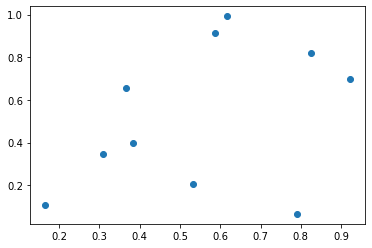

In [4]:
plt.scatter(x, y)

In [5]:
class Quadratic:
    def __init__(this, x: List[float], y: List[float]):
        xy = list(zip(x, y))
        xy.sort(key = lambda p: p[0])
        x, y = zip(*xy)
        this.x = x
        this.coefficients = []
        for x1, x2, x3, y1, y2, y3 in zip(x, x[1:], x[2:], y, y[1:], y[2:]):
            this.coefficients.append(this._get_parabola((x1, x2, x3), (y1, y2, y3)))
        print(list(zip(this.x, this.x[1:], this.x[2:])))
        
    def __call__(this, x: np.ndarray) -> List[float]:
        if x.ndim != 1:
            raise RuntimeError(f"x must have exactly 1 dimension, not {x.ndim}")
        return list(map(this._compute, x))
            
    def _compute(this, x: float):
        indices = []
        for (i, (x1, _, x3)) in enumerate(zip(this.x, this.x[1:], this.x[2:])):
            if x1 <= x and x <= x3:
                indices.append(i)
        if len(indices) == 0:
            raise RuntimeError(f"{x} is outside of interpolation range")
        total = 0
        for i in indices:
            total += (this.coefficients[i] * [x ** 2, x, 1]).sum()
        return total / len(indices)

    def _get_parabola(this, x: Tuple[float, float, float], y: Tuple[float, float, float]) -> np.ndarray:
        return np.linalg.solve(
            [[x_i * x_i, x_i, 1] for x_i in x],
            y
        )


[(0.16568728368878083, 0.30763338797950246, 0.36584835924937553), (0.30763338797950246, 0.36584835924937553, 0.38370480861420864), (0.36584835924937553, 0.38370480861420864, 0.5332655736050008), (0.38370480861420864, 0.5332655736050008, 0.5857873539022715), (0.5332655736050008, 0.5857873539022715, 0.6177528569514706), (0.5857873539022715, 0.6177528569514706, 0.7896128249156874), (0.6177528569514706, 0.7896128249156874, 0.8243737469076314), (0.7896128249156874, 0.8243737469076314, 0.9217265098962596)]


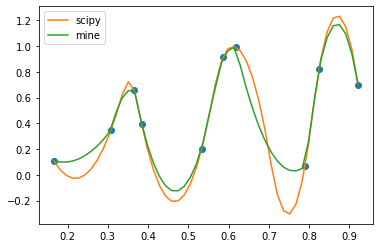

In [6]:
interpolated = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.linspace(min(x), max(x))
plt.plot(x, y, 'o')
plt.plot(xnew, interpolated(xnew), '-', label="scipy")
plt.plot(xnew, Quadratic(x, y)(xnew), '-', label="mine")
plt.legend()